<font size="5">**Multiple Linear Regression for Robot Calibration**</font>

Predicting the current draw into one of the joints as a function of the robot motion, essential in predicting overall robot power consumption. Robot data obtained from TU Dortmund's MLRA Project.

**Load and Visualize data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model

Defining column names before importing training dataset:

In [3]:
names = [
         't',                                  # Time (secs)
         'q1', 'q2', 'q3',                     # Joint angle   (rads)
         'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
         'I1', 'I2', 'I3',                     # Motor current (A)
         'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
         'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]

Loading the training dataset and checking the data:

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/cb9f6cac778208a2dd29a1deaac60da9d220d2d1/unit03_mult_lin_reg/exp1.csv', names=names, header=None, na_values='?')

df.head(3)


,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28


Extracting the time & 2nd Joint current indices and visualizing the data:

In [5]:
df_time = df['t']
df_time.head(3)

0    0.00
1    0.01
2    0.02
Name: t, dtype: float64

In [6]:
df_current = df['I2']
df_current.head(3)

0   -0.40812
1   -0.37241
2   -0.40302
Name: I2, dtype: float64

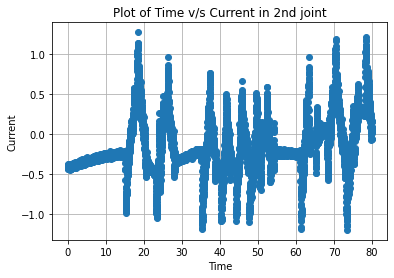

In [8]:
x = np.array(df_time)
ytrain = np.array(df_current)

plt.plot(x,ytrain,'o')
plt.title('Plot of Time v/s Current in 2nd joint')
plt.xlabel('Time')
plt.ylabel('Current')
plt.grid(True)

Preparing data for model fitting:

In [ ]:
Xtrain = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

**Fitting a Linear Model using sklearn**

Creating a regression object:

In [ ]:
regr = linear_model.LinearRegression()

Training the model on training data:

In [ ]:
regr.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Computing the joint current prediction:

In [ ]:
ytrain_pred = regr.predict(Xtrain)

Plotting actual v/s predicted values based on training data:

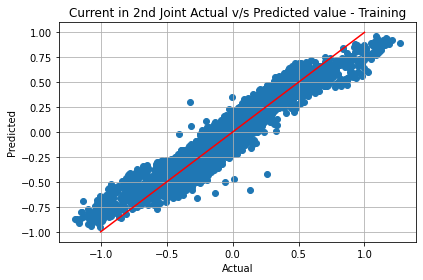

In [ ]:
plt.scatter(ytrain,ytrain_pred)
plt.plot([-1,1],[-1,1],'r')
plt.title('Current in 2nd Joint Actual v/s Predicted value - Training')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.tight_layout()

Measuring normalized RSS:

In [ ]:
RSS_train = np.mean((ytrain_pred-ytrain)**2)/(np.std(ytrain)**2)
Rsq_train = 1-RSS_train
print("RSS per sample = {0:f}".format(RSS_train))
print("R^2 =            {0:f}".format(Rsq_train))

RSS per sample = 0.095833
R^2 =            0.904167


**Measuring the fit on an Independent Dataset**

Importing the independent dataset and checking the data:

In [ ]:
df_test = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/3c0858e6d52974c43e6fccd55519c7ca4e64659c/unit03_mult_lin_reg/exp2.csv', names=names, header=None, na_values='?')

df_test.head(3)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.1341,-0.045712,6.210306e-319,1.582900
1,0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.0582,0.125580,1.766878e-319,0.414660
2,0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.2952,-0.130080,4.990557e-320,0.082286


Preparing the data for testing:

In [ ]:
ytest = np.array(df_test['I2'])
Xtest = df_test[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

Computing prediction using test data based on obtained model:

In [ ]:
ytest_pred = regr.predict(Xtest)

Plotting actual v/s predicted values based on test data:

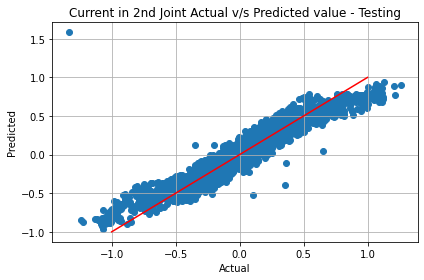

In [ ]:
plt.scatter(ytest,ytest_pred)
plt.plot([-1,1],[-1,1],'r')
plt.title('Current in 2nd Joint Actual v/s Predicted value - Testing')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.tight_layout()

Measuring normalized RSS on test data:

In [ ]:
RSS_test = np.mean((ytest_pred-ytest)**2)/(np.std(ytest)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.126780
R^2 =            0.873220
